# Milestone 1 Assignment - Capstone Proposal

## Author - David Parks

# TASKS
1. ~~~question_title: apply NLP and turn to features~~
2. accepted_answer_id: convert to Boolean was_accepted (I don't think we need this. Answers are not relevant because we are looking at the questions?)
3. Investigate other cols
4. Call out the correlation between reputation, upvotes, and downvotes and reduce to just reputation
5. ~~badge_counts: clean text field to be a count of badges (Might need to be removed due to correlation)~~
6. General text cleanup

### Capstone Project Instructions
Select a problem and data sets of particular interest and apply the analytics process to find and report on a solution.

Students will construct a simple dashboard to allow a non-technical user to explore their solution. The data should be read from a suitable persistent data storage, such as an Internet URL or a SQL data base.

The process followed by the students and the grading criteria include:
<ol style="list-style-type: lower-alpha;">
<li>Understand the business problem <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span></li>
<li>Evaluate and explore the available data <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span></li>
<li>Proper data preparation <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span> <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span></li>
<li>Exploration of data and understand relationships <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span> <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span></li>
<li>Perform basic analytics and machine learning, within the scope of the course, on the data.  <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span> <span class="label" style="border-radius: 3px; background-color: slateblue; color: white;">Milestone 3</span> <BR/>For example, classification to predict which employees are most likely to leave the company.</li>
<li>Create a written and/or oral report on the results suitable for a non-technical audience. <span class="label" style="border-radius: 3px; background-color: slateblue; color: white;">Milestone 3</span></li>
</ol>




## Tasks
For this proposal, you are to:
1. Generate or describe a solvable business problem and outline the flow of data needed to address the problem.
2. Identify 2 or more available data sets
3. Report on the statistics of each data set to include: type, unique values, missing values, quantile statistics, descriptive statistics, most frequent values, and histogram. Include analysis statements based on results.
4. Perform data preparation based on analysis of the quality of the available data include concatenation method, imputation method(s), dealing with outliers, and binning/scaling transformation.
5. Output the resulting data into a new data file
6. Identify potential machine learning model(s)


## Problem Definition



### Overview

The Stack Exchange network is a top resource for question and answer resource sharing.  Stack Overflow, targeted to programmers and developers is the top exchange with 9m visits/day and almost 7k questions posted per day <sup>1</sup>.  Users can subscribe to recieve notifications for questions posted to specific topics (tags), but users who cross over a number of topics can quickly get overwhelmed by the amount of data coming through.  

The BigQuery Stack Overflow dataset<sup>2</sup> shows 46.7% of questions not having an accepted answer as of the start of June.  While some questions can be assumed to be obscure, non-reproducable, or vague, developers not receiving timely help on questions lowers productivity and can not only slow innovation, but also have major financial impacts on corporations.

### Proposed Solution

Our goal is to create a machine learning model that given how a user has answered questions in the past, can propose other questions the user might know the answer to.  Such a model can be used either on the Stack Exchange network, or internally in corporations, to suggest related questions to users.

###  Approach

To solve this problem, a few methodologies from data science may be employed.  Foremost, natural language processing (NLP) can be employed to investigate the content of questions and answers to create context that tags alone cannot give.  We will combine that with a number of other available features which we will then reduce to the most salient features for the model.  UV Decomposition might make a good approach.  With the most relevant features, we can explore a number of modeling approaches to compare their performance.  For this we will likely explore decision trees and clustering.  The end goal is to compare a content-based recommendation system with a collaboarative filtering system.

### Data Sources

The main source for the data is stack overflow dataset stored on Google BigQuery.  The tables are updated quarterly from the archive.org data<sup>3</sup>.  We have a defined SQL query to join the needed data from BigQuery and export that as a csv.  

That data is supplemented with data from the Stack Exchange API<sup>4</sup>.

### Data Flow

### Resources

<sup>1</sup> https://stackexchange.com/sites?view=list#traffic<br/>
<sup>2</sup> https://cloud.google.com/bigquery/public-data/stackoverflow last updated: 6/3/2018<br/>
<sup>3</sup> https://archive.org/download/stackexchange<br/>
<sup>4</sup> https://api.stackexchange.com/<br/>

## Data Sets and Imports

In [1]:
# Datasets location
bq_data = 'https://storage.googleapis.com/stackex/stackex-full.csv'
user_data = 'https://storage.googleapis.com/stackex/users_basic_info.csv'
answer_data = "https://storage.googleapis.com/stackex/top_answer_tags.csv"
question_data = "https://storage.googleapis.com/stackex/top_questions_tags.csv"

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import scipy
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Matplotlib setup
%matplotlib inline
sns.set()

## Data Imports and Joins

In [4]:
# Load Datasets
df_bq = pd.read_csv(bq_data, index_col=13, infer_datetime_format=True)
df_user = pd.read_csv(user_data)
df_ans = pd.read_csv(answer_data)
df_question = pd.read_csv(question_data)

In [5]:
# Preview BigQuery Data  #TODO: The date cols are still not reading in as proper dates.
# print(df_bq.dtypes)
df_bq.head(2)

,question_id,question_tile,question_body,accepted_answer_id,answer_count,question_creation_date,question_fav_count,question_owner_display_name,question_owner_id,question_post_type_id,...,answer_score,answer_tags,user_id,user_display_name,user_reputation,user_up_votes,user_down_votes,user_views,user_profile_img_url,user_website_url
answer_id,,,,,,,,,,,,,,,,,,,,,
2791,4,"While applying opacity to a form, should we us...",<p>I want to use a track-bar to change a form'...,7.0,13,2008-07-31 21:42:52.667 UTC,41.0,NaN,8.0,1,...,55,NaN,446,andnil,19909,288,19,494,NaN,NaN
7262131,4,"While applying opacity to a form, should we us...",<p>I want to use a track-bar to change a form'...,7.0,13,2008-07-31 21:42:52.667 UTC,41.0,NaN,8.0,1,...,42,NaN,59303,ChrisF,110411,2535,659,23503,https://i.stack.imgur.com/gIt1g.png?s=128&g=1,NaN


In [6]:
# Preview User Data
# print(df_user.dtypes)
df_user.head(2)

,Unnamed: 0,accept_rate,account_id,badge_counts,creation_date,display_name,is_employee,last_access_date,last_modified_date,link,...,reputation,reputation_change_day,reputation_change_month,reputation_change_quarter,reputation_change_week,reputation_change_year,timed_penalty_date,user_id,user_type,website_url
0,0,100.0,9,"{'bronze': 391, 'silver': 328, 'gold': 33}",1217564284,Chris Jester-Young,False,1531024246,1.530587e+09,https://stackoverflow.com/users/13/chris-jeste...,...,175227,20,510,510,20,6487,NaN,13,registered,http://about.cky.nz/
1,1,93.0,97,"{'bronze': 382, 'silver': 261, 'gold': 98}",1217656317,Mark Harrison,False,1531640910,1.530944e+09,https://stackoverflow.com/users/116/mark-harrison,...,162575,30,569,569,30,10149,NaN,116,registered,http://markharrison.net


In [7]:
# Preview Answer Data
# print(df_ans.dtypes)
df_ans.head(2)

,Unnamed: 0,answer_count,answer_score,question_count,question_score,tag_name,user_id
0,0,19,633,1,93,c#,1
1,1,15,487,1,-3,regex,1


In [8]:
# Preview Question Data
# print(df_question.dtypes)
df_question.head(2)

,Unnamed: 0,answer_count,answer_score,question_count,question_score,tag_name,user_id
0,0,8,331,4,1161,sql-server,1
1,1,4,248,2,1069,sql,1


In [9]:
answers = pd.merge(df_bq, df_user, on='user_id', how='left')
answers.head()

,question_id,question_tile,question_body,accepted_answer_id,answer_count,question_creation_date,question_fav_count,question_owner_display_name,question_owner_id,question_post_type_id,...,profile_image,reputation,reputation_change_day,reputation_change_month,reputation_change_quarter,reputation_change_week,reputation_change_year,timed_penalty_date,user_type,website_url
0,4,"While applying opacity to a form, should we us...",<p>I want to use a track-bar to change a form'...,7.0,13,2008-07-31 21:42:52.667 UTC,41.0,NaN,8.0,1,...,https://www.gravatar.com/avatar/adaa401e4a2c24...,20219.0,0.0,150.0,150.0,0.0,1473.0,NaN,registered,NaN
1,4,"While applying opacity to a form, should we us...",<p>I want to use a track-bar to change a form'...,7.0,13,2008-07-31 21:42:52.667 UTC,41.0,NaN,8.0,1,...,https://i.stack.imgur.com/gIt1g.png?s=128&g=1,111212.0,30.0,200.0,200.0,30.0,3683.0,NaN,moderator,NaN
2,4,"While applying opacity to a form, should we us...",<p>I want to use a track-bar to change a form'...,7.0,13,2008-07-31 21:42:52.667 UTC,41.0,NaN,8.0,1,...,https://www.gravatar.com/avatar/fcc79759f6398c...,7733.0,0.0,40.0,40.0,0.0,290.0,NaN,registered,http://rcfox.ca
3,4,"While applying opacity to a form, should we us...",<p>I want to use a track-bar to change a form'...,7.0,13,2008-07-31 21:42:52.667 UTC,41.0,NaN,8.0,1,...,https://www.gravatar.com/avatar/23c1e206368862...,14222.0,0.0,83.0,83.0,0.0,808.0,NaN,registered,http://weblogs.asp.net/kdente
4,4,"While applying opacity to a form, should we us...",<p>I want to use a track-bar to change a form'...,7.0,13,2008-07-31 21:42:52.667 UTC,41.0,NaN,8.0,1,...,https://www.gravatar.com/avatar/ea7063d6a51a92...,11163.0,0.0,80.0,80.0,0.0,373.0,NaN,registered,http://huseyint.com/


## Data Dictionaries and Column Selection

A number of columns in the dataset were pulled to enable applications to be built and for user examination and are not useful for analysis.

In [10]:
fields_not_useful = [
                        'question_id', 'question_fav_count', 'question_owner_id', 'question_post_type_id',
                        'question_score', 'question_view_count', 'answer_comments', 'answer_creation_date',
                        'answer_parent_id', 'answer_post_type_id', 'answer_tags', 'answer_owner_id', 
                        'user_reputation', 'user_up_votes', 'user_down_votes', 'user_views', 'Unnamed: 0',
                        'accept_rate', 'account_id', 'badge_counts', 'creation_date', 'display_name', 
                        'last_access_date', 'last_modified_date', 'link', 'location', 'profile_image',
                        'reputation_change_day', 'reputation_change_month', 'reputation_change_quarter',
                        'reputation_change_week', 'reputation_change_year', 'timed_penalty_date', 'user_id',
                        'website_url'
                    ]
fields_application = [
                        'question_owner_display_name', 'answer_count', 'question_creation_date', 'user_id', 
                        'user_display_name', 'user_profile_img_url', 'user_website_url'
                     ]
fields_procrastination = ['question_body', 'question_tags', 'answer_body']
fields_to_use = ['question_tile', 'accepted_answer_id', 'answer_score', 'is_employee', 'reputation', 'user_type',
                 'user_up_votes', 'user_down_votes', 'accept_rate', 'badge_counts'
                ] #'answer_id', 

In [11]:
df_trimmed = answers[fields_to_use]
df_trimmed.head()

,question_tile,accepted_answer_id,answer_score,is_employee,reputation,user_type,user_up_votes,user_down_votes,accept_rate,badge_counts
0,"While applying opacity to a form, should we us...",7.0,55,False,20219.0,registered,288,19,NaN,"{'bronze': 24, 'silver': 23, 'gold': 2}"
1,"While applying opacity to a form, should we us...",7.0,42,False,111212.0,moderator,2535,659,84.0,"{'bronze': 288, 'silver': 211, 'gold': 21}"
2,"While applying opacity to a form, should we us...",7.0,53,False,7733.0,registered,280,152,90.0,"{'bronze': 48, 'silver': 29, 'gold': 3}"
3,"While applying opacity to a form, should we us...",7.0,395,False,14222.0,registered,45,4,32.0,"{'bronze': 45, 'silver': 35, 'gold': 7}"
4,"While applying opacity to a form, should we us...",7.0,114,False,11163.0,registered,551,21,63.0,"{'bronze': 75, 'silver': 44, 'gold': 15}"


## Profile Reports & Analysis Statements

In [12]:
pandas_profiling.ProfileReport(df_trimmed)

Number of variables,10
Number of observations,20000
Total Missing (%),4.4%
Total size in memory,1.7 MiB
Average record size in memory,88.0 B
Numeric,6
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Column Commentary

#### question_title

This column has no null values.  The details are not meaningful until the text is broken into individual features, but it is nice to know that every answer was to a question!

The data contains 2,690 unique questions in the 20,000 questions, which signifies that a better sample can be taken from the original dataset.

#### accepted_answer_id

This column has 18% null values.  That is 18% of the rows, not 18% of questions since there is a row for each answer.  

This feature will need to be converted into a binary detailing if the given answer was accepted.

#### answer_score

This column has no null values and is non-normal data.

In [34]:
## Simple NLP on the question title

#!pip install nltk --upgrade

import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# -- tokenize
df_trimmed['question_title_tokens'] = df_trimmed.question_tile.apply(word_tokenize)
display(df_trimmed.head(1))

# -- clean
import re

def not_symbol(token):
    return re.match(r'\w+', token)

def not_stop_words(token):
    return token.lower() not in stopwords.words('english')

def clean(tokens):
    clean_tokens = []
    for token in tokens:
        if not_stop_words(token) and not_symbol(token):
            clean_tokens.append(token.lower())
            
    return clean_tokens

df_trimmed['question_title_clean_tokens'] = df_trimmed['question_title_tokens'].apply(clean)
display(df_trimmed.head(1))

# -- word stem
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

lmtzr = WordNetLemmatizer()
def get_stem(tokens):
    return [lmtzr.lemmatize(token) for token in tokens]

df_trimmed['question_title_stems'] = df_trimmed['question_title_clean_tokens'].apply(get_stem)
display(df_trimmed.head(1))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,question_tile,accepted_answer_id,answer_score,is_employee,reputation,user_type,user_up_votes,user_down_votes,accept_rate,badge_counts,bronze_badge,silver_badge,gold_badge,question_title_tokens,question_title_clean_tokens
0,"While applying opacity to a form, should we us...",7.0,55,False,20219.0,registered,288,19,NaN,"{'bronze': 24, 'silver': 23, 'gold': 2}",24,23,2,"[While, applying, opacity, to, a, form, ,, sho...","[applying, opacity, form, use, decimal, double..."


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,question_tile,accepted_answer_id,answer_score,is_employee,reputation,user_type,user_up_votes,user_down_votes,accept_rate,badge_counts,bronze_badge,silver_badge,gold_badge,question_title_tokens,question_title_clean_tokens
0,"While applying opacity to a form, should we us...",7.0,55,False,20219.0,registered,288,19,NaN,"{'bronze': 24, 'silver': 23, 'gold': 2}",24,23,2,"[While, applying, opacity, to, a, form, ,, sho...","[applying, opacity, form, use, decimal, double..."


[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,question_tile,accepted_answer_id,answer_score,is_employee,reputation,user_type,user_up_votes,user_down_votes,accept_rate,badge_counts,bronze_badge,silver_badge,gold_badge,question_title_tokens,question_title_clean_tokens,question_title_stems
0,"While applying opacity to a form, should we us...",7.0,55,False,20219.0,registered,288,19,NaN,"{'bronze': 24, 'silver': 23, 'gold': 2}",24,23,2,"[While, applying, opacity, to, a, form, ,, sho...","[applying, opacity, form, use, decimal, double...","[applying, opacity, form, use, decimal, double..."


count    20000.00000
mean        13.84465
std         86.61037
min        -26.00000
25%          1.00000
50%          2.00000
75%          7.00000
max       4957.00000
Name: answer_score, dtype: float64


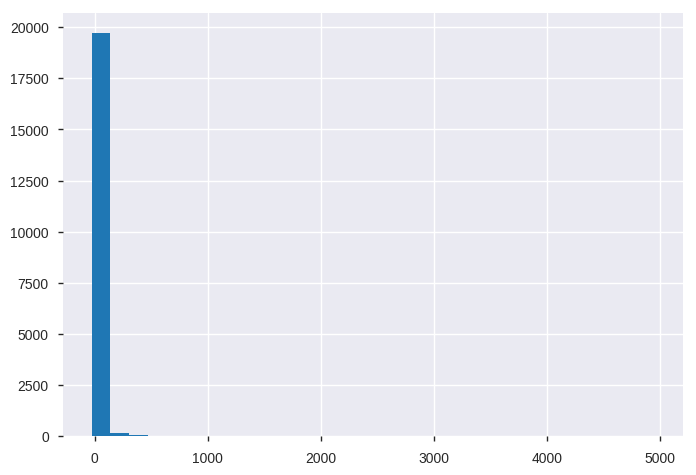

In [13]:
print(df_trimmed['answer_score'].describe())
df_trimmed['answer_score'].hist(bins=30)

#### is_employee

This column has no null values.  Almost all answers were given by users who were not employees.

In [14]:
df_trimmed['is_employee'].value_counts()

False    19801
True       197
Name: is_employee, dtype: int64

#### reputation

Reputation only has two null values in this sample.  Those values can easily be droped or imputed as 0.

The data is also non-normal

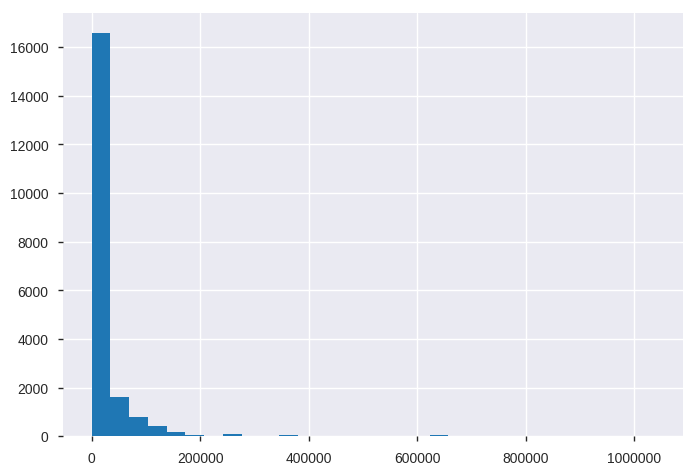

In [15]:
df_trimmed['reputation'].hist(bins=30)

#### user_type

There are two users who do not have a user type.  Since there were 2 missing values for reputation, this could be two two rows that failed to join.

Most of the users are registered users.

registered      19219
unregistered      622
moderator         157
Name: user_type, dtype: int64


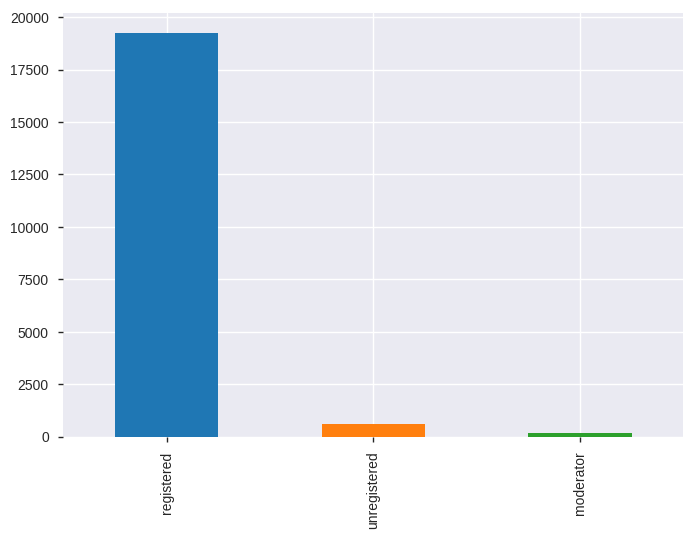

In [16]:
print(df_trimmed['user_type'].value_counts())
df_trimmed['user_type'].value_counts().plot.bar()

#### user_up_votes

This data has no null values.  6% of the rows have 0 upvotes.  This data is also non-normal

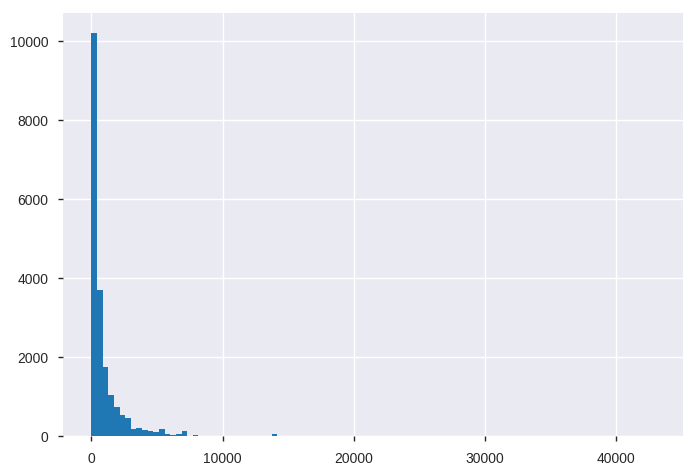

In [17]:
df_trimmed['user_up_votes'].hist(bins=100)

#### user_down_votes

User downvotes are very similar to upvotes except 15% of the rows contain 0 downvotes.

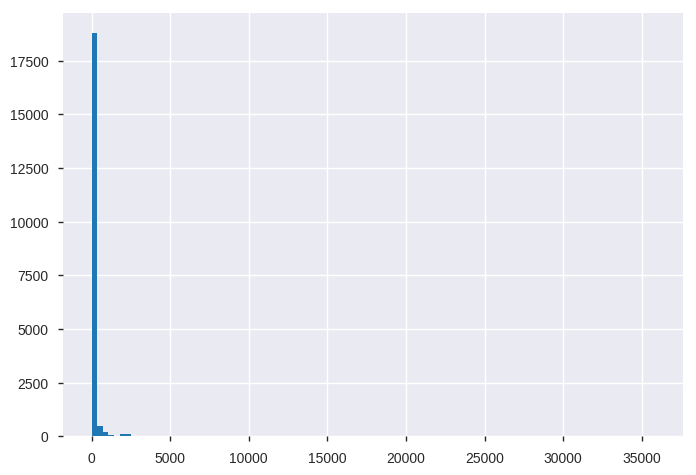

In [18]:
df_trimmed['user_down_votes'].hist(bins=100)

#### accept_rate

This column has 26% missing values.  The missing values should likely be a 0% acceptance rate.

Actually, I am not sure what this means tbh.  I may just drop the column.

In [19]:
# df_trimmed.loc[df_trimmed['accept_rate'].isnull()]

#### badge_counts

Badge counts will be broken down into seperate columns. Null values will be replaced with 0s.

In [20]:
from ast import literal_eval

df_trimmed.badge_counts = df_trimmed.badge_counts.fillna("{'bronze': 0, 'silver': 0, 'gold': 0}")

df_trimmed['bronze_badge'] = df_trimmed.badge_counts.apply(lambda value: literal_eval(value)["bronze"])
df_trimmed['silver_badge'] = df_trimmed.badge_counts.apply(lambda value: literal_eval(value)["silver"])
df_trimmed['gold_badge'] = df_trimmed.badge_counts.apply(lambda value: literal_eval(value)["gold"])

df_trimmed.drop('badge_counts', axis=1, inplace=True)
display(df_trimmed.head())

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

,question_tile,accepted_answer_id,answer_score,is_employee,reputation,user_type,user_up_votes,user_down_votes,accept_rate,badge_counts,bronze_badge,silver_badge,gold_badge
0,"While applying opacity to a form, should we us...",7.0,55,False,20219.0,registered,288,19,NaN,"{'bronze': 24, 'silver': 23, 'gold': 2}",24,23,2
1,"While applying opacity to a form, should we us...",7.0,42,False,111212.0,moderator,2535,659,84.0,"{'bronze': 288, 'silver': 211, 'gold': 21}",288,211,21
2,"While applying opacity to a form, should we us...",7.0,53,False,7733.0,registered,280,152,90.0,"{'bronze': 48, 'silver': 29, 'gold': 3}",48,29,3
3,"While applying opacity to a form, should we us...",7.0,395,False,14222.0,registered,45,4,32.0,"{'bronze': 45, 'silver': 35, 'gold': 7}",45,35,7
4,"While applying opacity to a form, should we us...",7.0,114,False,11163.0,registered,551,21,63.0,"{'bronze': 75, 'silver': 44, 'gold': 15}",75,44,15


### Correlations

The columns reputation and user_up_votes have a very high correlation.  user_down_votes and accept_rate are not as strong, but up and down votes can likely be represented by reputation, and due to the amount of nulls in accept_rate, we can move forward with the assumption that those can be represented by reputation as well.

Text(0.5,1,'Correlation Matrix for User Performance')

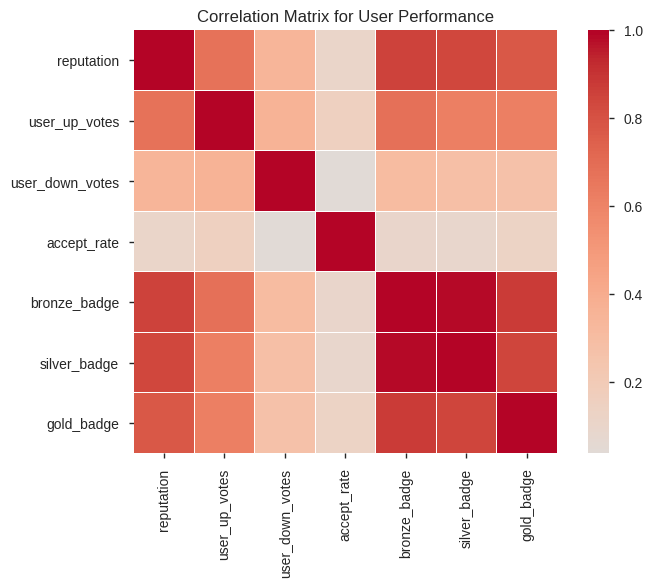

In [23]:
corr = df_trimmed[['reputation', 'user_up_votes', 'user_down_votes', 'accept_rate', 'bronze_badge', 'silver_badge', 'gold_badge']].corr()
ax = sns.heatmap(corr, center=0, square=True, linewidths=0.25, cmap="coolwarm")
ax.set_title("Correlation Matrix for User Performance")


### High correlation among badges and reputation

## Data Preparation



## Code Output

## Machine Learning Model(s)